Processed: 1/300 stocks
Processed: 51/300 stocks
Processed: 101/300 stocks
Processed: 151/300 stocks
Processed: 201/300 stocks
Processed: 251/300 stocks


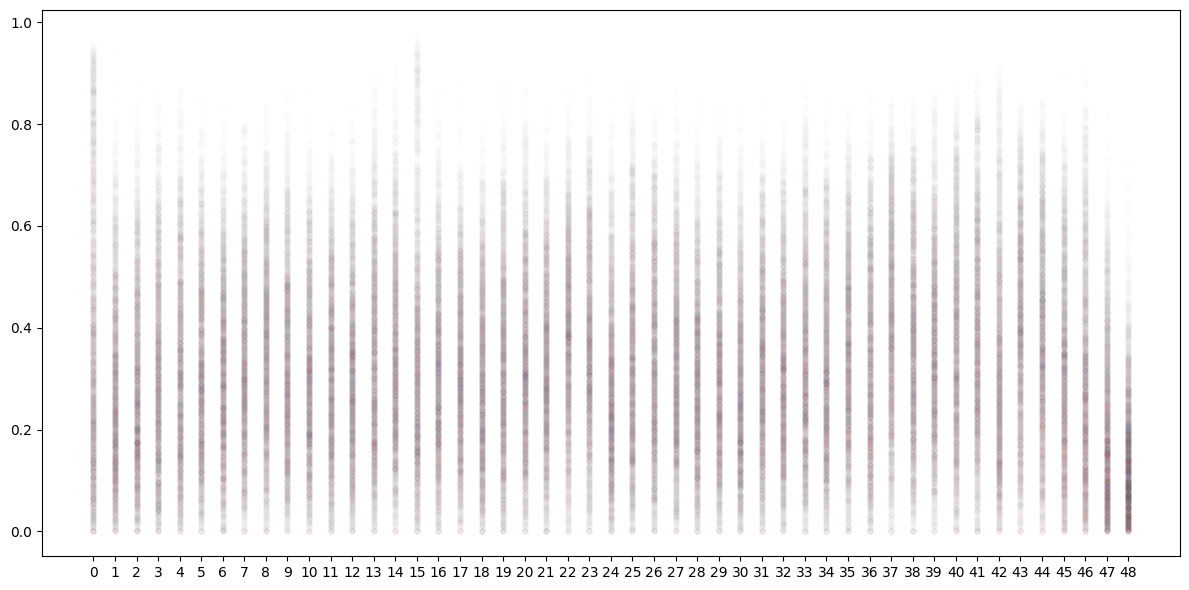

Completed analysis for 300 stocks


In [33]:
import pandas as pd
from single_cal import simple_cal
from all_cal import get_composites
import matplotlib.pyplot as plt
import numpy as np

composites = get_composites("SH000300")
plt.figure(figsize=(12,6))
df_all=pd.DataFrame(columns=range(49))
for i, full_code in enumerate(composites['full_code'].to_list()):
    try:
        # Fix path to use local directory
        df_tmp = pd.read_csv(f'E:/tbu/temp/{full_code}.csv')
        df_tmp.set_index('Unnamed: 0', inplace=True)
        
        # Convert index to datetime for proper plotting
        df_tmp.index = pd.to_datetime(df_tmp.index)
        # Convert all columns to numeric, handling errors gracefully
        for index in df_tmp.index:
            df_all.loc[df_all.shape[0]]=pd.Series(df_tmp.loc[index].tolist())

            df_tmp.loc[index] = pd.to_numeric(df_tmp.loc[index], errors='coerce')
            df_tmp.loc[index].fillna(0,inplace=True)       
        # Remove any rows with NaN values
        # df_tmp = df_tmp.dropna()
        
        # Plot each metric in its own subplot
            plt.scatter(df_tmp.columns,df_tmp.loc[index],s=15,alpha=0.005)
        
        if i % 50 == 0:  # Print progress every 50 stocks
            print(f"Processed: {i+1}/{len(composites)} stocks")
        
    except Exception as e:
        print(f"Error processing {full_code}: {e}")
        continue
    # plt.show()
    # break


# plt.tight_layout()
# plt.show()

print(f"Completed analysis for {len(composites)} stocks")

In [36]:
df_all.to_csv('df_all_very_important.csv')

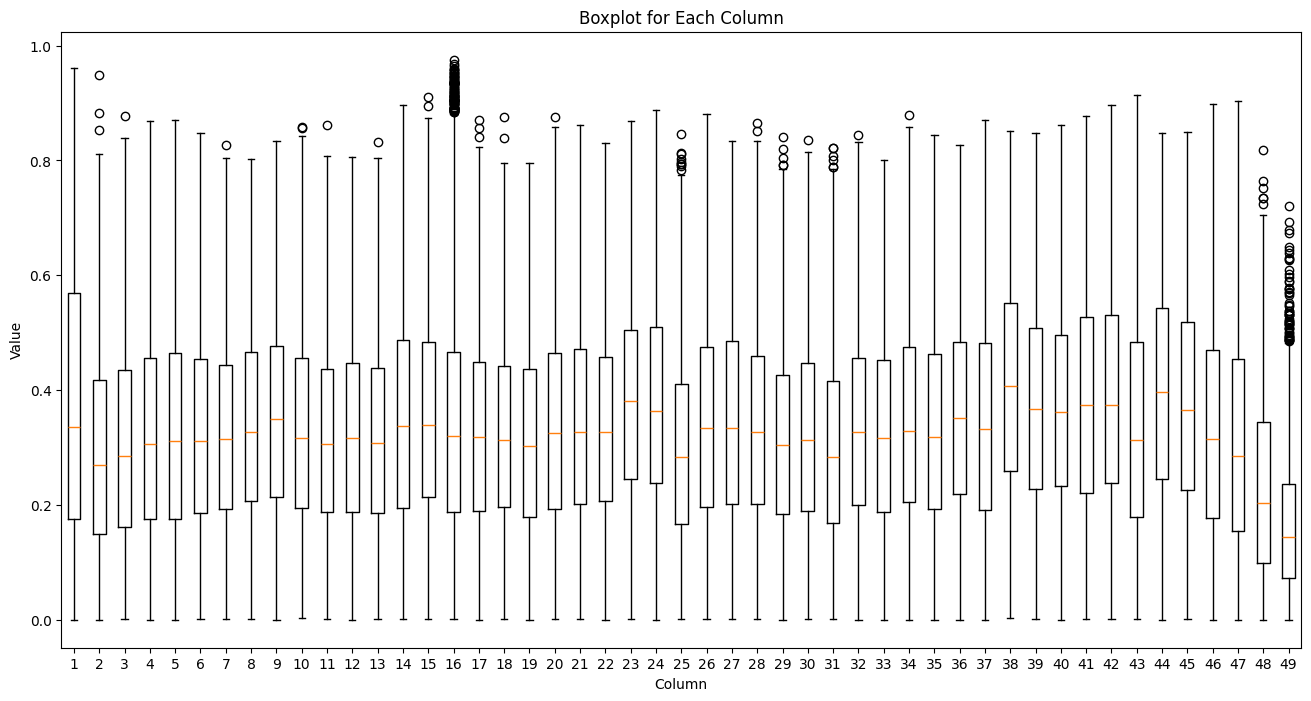

In [37]:
plt.figure(figsize=(16, 8))
plt.boxplot([df_all[col].dropna() for col in df_all.columns], showfliers=True)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplot for Each Column')
plt.show()

In [49]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.455162,0.492810,0.183734,0.211530,0.492047,0.397415,0.308766,0.135366,0.173702,0.099995,...,0.236335,0.131029,0.125100,0.182050,0.128731,0.152690,0.304817,0.188677,0.116001,0.270989
1,0.580467,0.464459,0.472991,0.344561,0.390700,0.465934,0.351469,0.359753,0.543008,0.560819,...,0.246385,0.400353,0.314809,0.250237,0.223092,0.135628,0.242644,0.168754,0.150365,0.174688
2,0.633476,0.414156,0.391007,0.137777,0.301288,0.079735,0.175652,0.462488,0.539407,0.338893,...,0.215826,0.177062,0.233056,0.200264,0.224591,0.081139,0.042057,0.167943,0.013637,0.343041
3,0.440103,0.680882,0.489129,0.438013,0.504888,0.473072,0.545228,0.583942,0.527439,0.644725,...,0.213301,0.229156,0.343637,0.276046,0.490760,0.329972,0.063990,0.146403,0.150299,0.136925
4,0.725234,0.553561,0.221209,0.515161,0.469420,0.490404,0.476404,0.525749,0.387947,0.438306,...,0.288064,0.487127,0.138787,0.297660,0.135081,0.249009,0.250317,0.247402,0.252220,0.390235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.131784,0.153242,0.353790,0.199010,0.296907,0.109978,0.454479,0.389346,0.323078,0.328180,...,0.500610,0.330639,0.240425,0.173308,0.141640,0.324233,0.178226,0.588635,0.261616,0.103183
2996,0.486304,0.409738,0.354645,0.616110,0.575914,0.479842,0.536532,0.600478,0.454944,0.445888,...,0.363007,0.514818,0.188148,0.366571,0.652341,0.576128,0.676360,0.337588,0.336393,0.097636
2997,0.460264,0.238608,0.492115,0.503404,0.366634,0.666006,0.337607,0.535144,0.379555,0.429658,...,0.237743,0.246496,0.397049,0.293711,0.513104,0.416836,0.380208,0.153567,0.303016,0.163476
2998,0.869347,0.342568,0.438491,0.511694,0.524124,0.431211,0.361152,0.220315,0.370476,0.486712,...,0.284736,0.533628,0.737151,0.189413,0.436942,0.530132,0.711300,0.668341,0.219139,0.163441


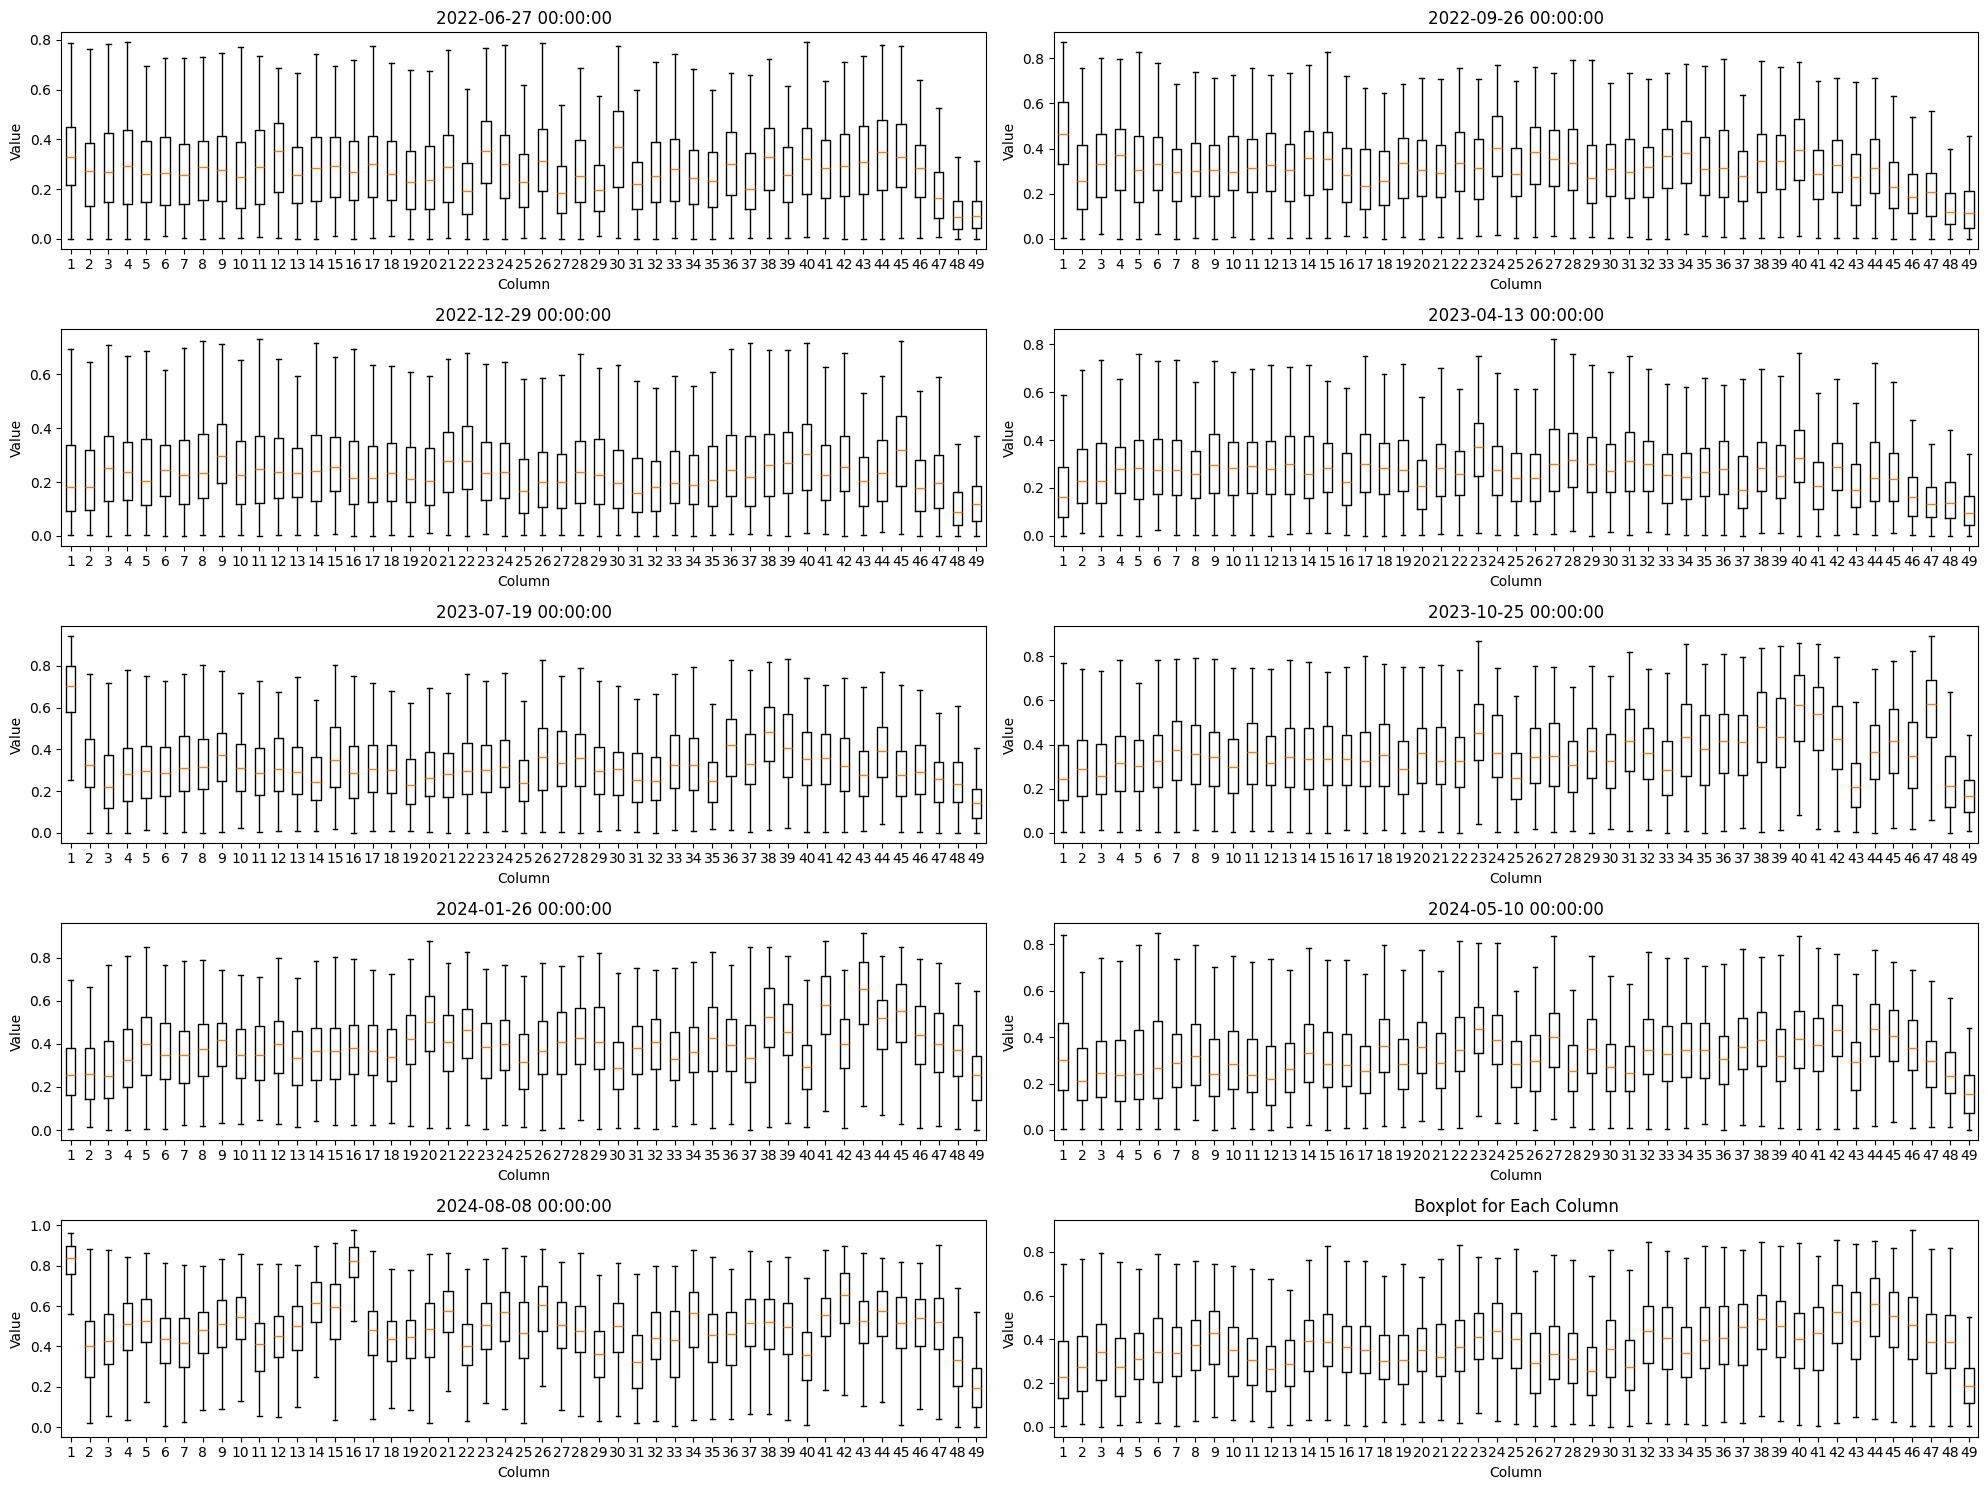

In [50]:
fig,axes=plt.subplots(5,2,figsize=(20, 15))
for i in range(10):
    axes[i//2,i%2].boxplot([df_all.loc[i::10,col].dropna() for col in df_all.columns], showfliers=False)
    axes[i//2,i%2].set_xlabel('Column')
    axes[i//2,i%2].set_ylabel('Value')
    axes[i//2,i%2].set_title(df_tmp.index[i])
    # axes[i].show()
# plt.figure(figsize=(16, 8))
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplot for Each Column')
plt.tight_layout()
plt.show()

In [14]:
for i, full_code in enumerate(composites['full_code'].to_list()):
    df_tmp = pd.read_csv(f'E:/tbu/temp/{full_code}.csv')
    df_tmp.set_index('Unnamed: 0', inplace=True)
    if df_tmp.isnull().any().any():
        print(full_code)


SH601059
SH601136
SH603296
SH688041
SH688271
SH688472
SH688506


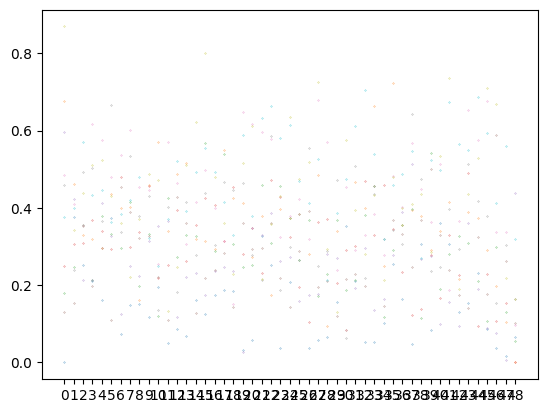

In [15]:
full_code=="SH601059"
df_tmp = pd.read_csv(f'E:/tbu/temp/{full_code}.csv')
df_tmp.set_index('Unnamed: 0', inplace=True)
if df_tmp.isnull().any().any():
    print(full_code)
    df_tmp.fillna(0,inplace=True)
for index in df_tmp.index:
    df_tmp.loc[index] = pd.to_numeric(df_tmp.loc[index], errors='coerce')

# Remove any rows with NaN values
# df_tmp = df_tmp.dropna()

# Plot each metric in its own subplot
    plt.scatter(df_tmp.columns,df_tmp.loc[index],s=0.05)


plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.116
Method:                 Least Squares   F-statistic:                   0.06438
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.806
Time:                        18:25:23   Log-Likelihood:                -24.184
No. Observations:                  10   AIC:                             52.37
Df Residuals:                       8   BIC:                             52.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0667      2.075      2.442      0.0

d:\Ctrans\Programs\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


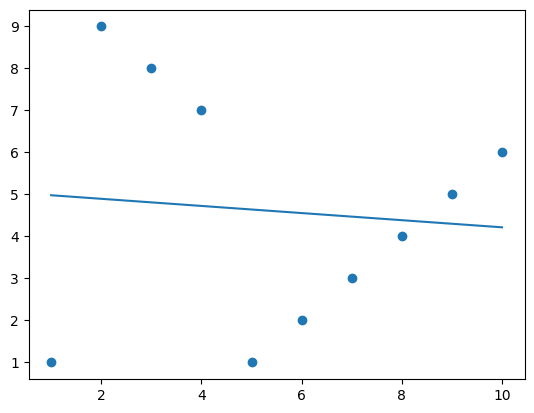

In [ ]:
import statsmodels.api as sm              # 用于统计建模（回归分析）
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
x=[1,2,3,4,5,6,7,8,9,10]
y=[1,9,8,7,1,2,3,4,5,6]
X=sm.add_constant(x)
results=sm.OLS(y,X).fit()
plt.scatter(x,y)
plt.plot(x,results.predict(X))
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     55.86
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           3.80e-05
Time:                        18:26:07   Log-Likelihood:                -30.615
No. Observations:                  11   AIC:                             65.23
Df Residuals:                       9   BIC:                             66.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3638      1.703     -0.214      0.8

d:\Ctrans\Programs\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


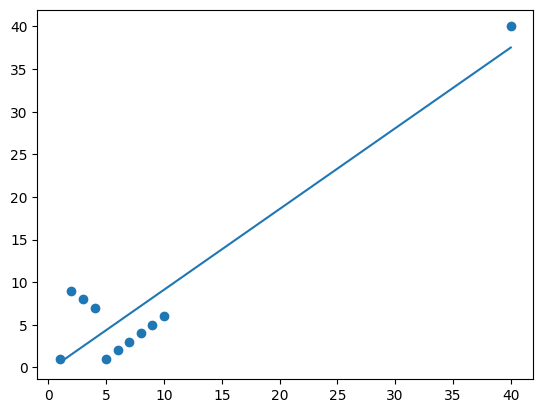

In [4]:
x.append(40)
y.append(40)
X=sm.add_constant(x)
results=sm.OLS(y,X).fit()
plt.scatter(x,y)
plt.plot(x,results.predict(X))
print(results.summary())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3075 entries, 2024-07-01 09:25:00 to 2024-12-30 15:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3075 non-null   float64
dtypes: float64(1)
memory usage: 112.6+ KB


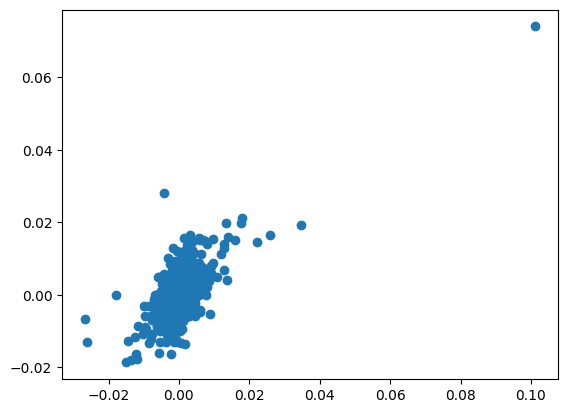

In [17]:
import pandas as pd
df_stk_ret=pd.read_csv('return_test.csv')
df_ind_ret=pd.read_csv('index_return_test.csv')
# df.set_index('Unnamed: 0',inplace=True)
# df.index=pd.to_datetime(df.index)
# df.index=df.index.date
# df['Price']=pd.to_numeric(df['Price'])
plt.scatter(df_ind_ret['Price'],df_stk_ret['Price'])
plt.show()

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

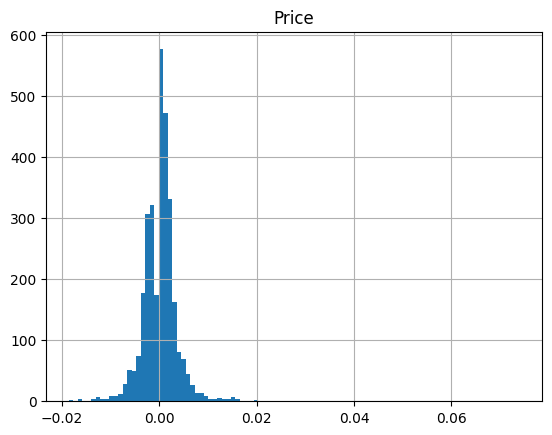

In [19]:
df_stk_ret.hist(bins=100)